In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_csv('Returns.csv')

In [10]:
df.dtypes

Unnamed: 0      int64
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
Returns       float64
dtype: object

In [11]:
df.isnull().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Returns       1
dtype: int64

In [12]:
null_data = df[df.isnull().any(axis=1)]
null_data

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,0,29-02-2016,867.538452,901.213257,850.118774,881.270386,821.853088,128311,NaN


In [13]:
df=df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 1 to 1231
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1231 non-null   int64  
 1   Date        1231 non-null   object 
 2   Open        1231 non-null   float64
 3   High        1231 non-null   float64
 4   Low         1231 non-null   float64
 5   Close       1231 non-null   float64
 6   Adj Close   1231 non-null   float64
 7   Volume      1231 non-null   int64  
 8   Returns     1231 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 96.2+ KB


In [15]:
df= df[['Date', 'Returns']]

In [16]:
df.set_index('Date', inplace=True, drop=True)
df.index = pd.to_datetime(df.index)

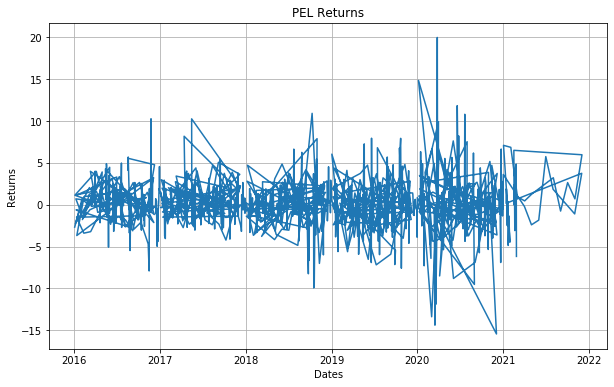

In [18]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Returns')
plt.plot(df['Returns'])
plt.title('PEL Returns')
plt.show()

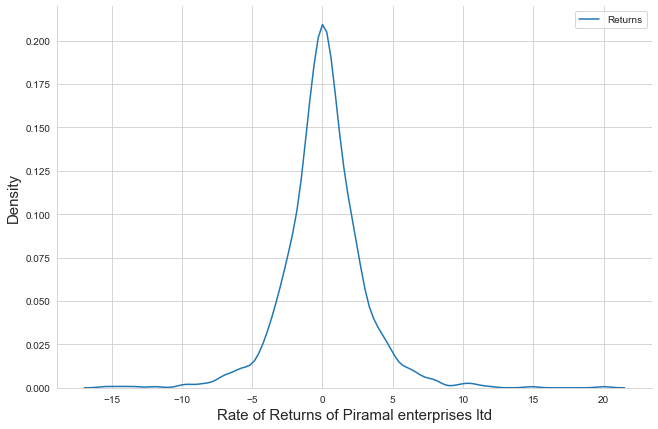

In [38]:
sns.set_style("whitegrid")
P=sns.FacetGrid(data=df,height=6,aspect=1.5, legend_out=True, palette="Set1").map(sns.kdeplot, "Returns")
plt.ylabel('Density',fontsize=15)
plt.xlabel('Rate of Returns of Piramal enterprises ltd',fontsize=15)
plt.legend()

In [19]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [20]:
test_result=adfuller(df['Returns'])

In [21]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Returns):
    result=adfuller(Returns)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [22]:
adfuller_test(df['Returns'])

ADF Test Statistic : -22.348266972843557
p-value : 0.0
#Lags Used : 1
Number of Observations Used : 1229
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

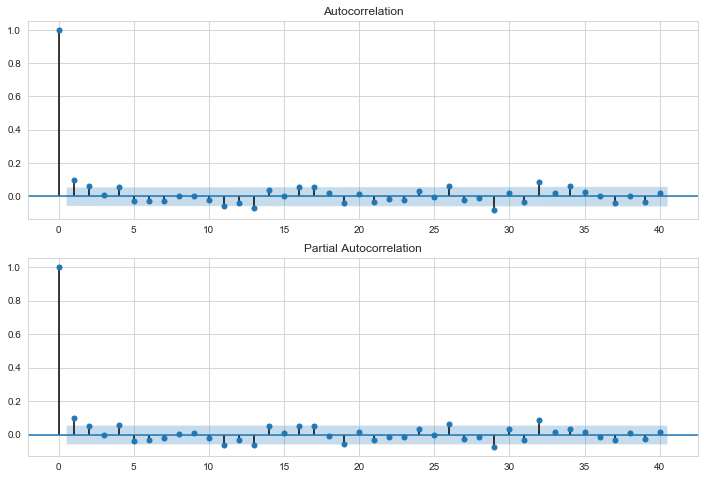

In [40]:
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Returns'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Returns'].iloc[1:],lags=40,ax=ax2)

In [25]:
#For non-seasonal data
#p=0, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [28]:
model=ARIMA(df['Returns'],order=(0,0,0))
model_fit=model.fit()

C:\Users\Parul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Parul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 1231
Model:                     ARMA(0, 0)   Log Likelihood               -3020.815
Method:                           css   S.D. of innovations              2.815
Date:                Sun, 28 Feb 2021   AIC                           6045.630
Time:                        12:35:34   BIC                           6055.861
Sample:                             0   HQIC                          6049.479
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0989      0.080      1.233      0.218      -0.058       0.256
==============================================================================
"""

In [41]:
model=ARIMA(df['Returns'],order=(1,0,0))
model_fit=model.fit()
model_fit.summary()

C:\Users\Parul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Parul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 1231
Model:                     ARMA(1, 0)   Log Likelihood               -3014.872
Method:                       css-mle   S.D. of innovations              2.802
Date:                Sun, 28 Feb 2021   AIC                           6035.744
Time:                        13:38:23   BIC                           6051.091
Sample:                             0   HQIC                          6041.518
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0981      0.089      1.108      0.268      -0.075       0.272
ar.L1.Returns     0.0982      0.028      3.456      0.001       0.043       0.154
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           10.1808           +0.0000j           10.1808            0.0000
-----------------------------------------------------------------------------
"""

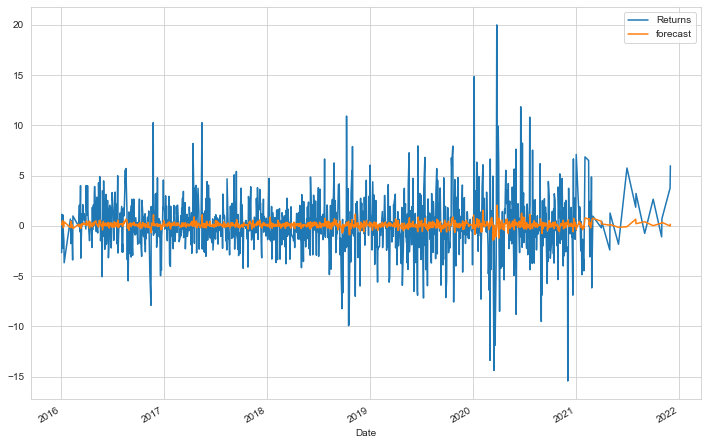

In [42]:
df['forecast']=model_fit.predict()
df[['Returns','forecast']].plot(figsize=(12,8))

In [33]:
df1= df[['Returns', 'forecast']]
df1

,Returns,forecast
Date,,
2016-01-03,-2.675913,0.098921
2016-02-03,0.673225,0.098921
2016-03-03,-0.028098,0.098921
2016-04-03,1.045535,0.098921
2016-08-03,1.930352,0.098921
...,...,...
2021-02-22,-1.806574,0.098921
2021-02-23,2.451241,0.098921
2021-02-24,0.413162,0.098921
